In [1]:
import arviz as az
import matplotlib.pylab as plt
import numpyro.distributions as dist

from makeCorner import *

az.rcParams["plot.max_subplots"] = 80

In [2]:
# cdf_file = "/home/max.lalleman/CBC_Stoch_Search/gwbcbcmodeling/gwbcbcmodeling/New_Code_New_sample/Varying_Power_Law_Sigmoid/cdf_files/CBC_z_0_to_4_analysis_high_low_for_mMax.cdf"
# "./RUNS/CBC_O3_Power_Law.cdf"
cdf_file = "../data/RUNS/power_law_only_high_sigmoids.cdf"
data = az.from_netcdf(cdf_file)

In [3]:
new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "high_alpha":dist.Normal(-2,3),
    "width_alpha":dist.Uniform(-1,1),
    "middle_z_alpha":dist.Uniform(0,0.8),
    "mu_m1":dist.Uniform(15,60),
    "mMin":dist.Uniform(5,15),
    "high_mMin":dist.Uniform(5, 15),
    "width_mMin":dist.Uniform(-1,1),
    "middle_z_mMin":dist.Uniform(0,0.8),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "beta_z":dist.Uniform(0,10),
    "zp": dist.Uniform(0,4),
    "fpeak": dist.Uniform(-6,0),
    "high_f_peak": dist.Uniform(-6,0),
    "width_f_peak": dist.Uniform(-1,1),
    "middle_z_f_peak": dist.Uniform(0,0.8),
    "sig_m1": dist.Uniform(1.5,15),
    "mMax":dist.Uniform(50,100),
    "high_mMax":dist.Uniform(50, 100),
    "width_mMax":dist.Uniform(-1,1),
    "middle_z_mMax":dist.Uniform(0,0.8),
    "dmMax":dist.Uniform(0.5,1.5),
    "high_dmMax":dist.Uniform(0.5,1.5),
    "width_dmMax":dist.Uniform(-1,1),
    "middle_z_dmMax":dist.Uniform(0,0.8),
    "dmMin":dist.Uniform(-1,0.5),
    "high_dmMin":dist.Uniform(-1,0.5),
    "width_dmMin":dist.Uniform(-1,1),
    "middle_z_dmMin":dist.Uniform(0,0.8),
}

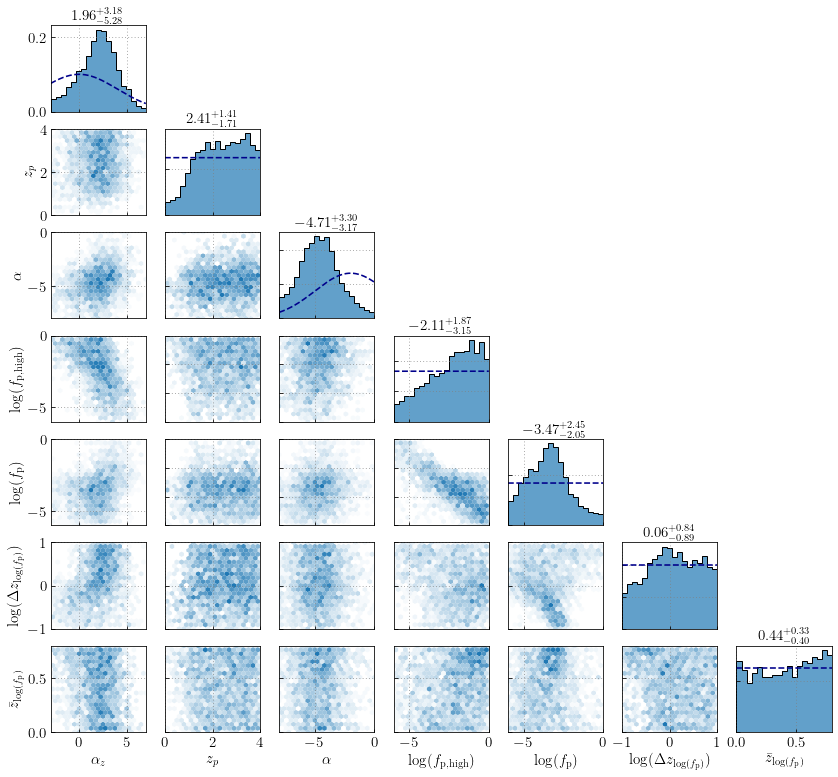

In [4]:
fig = plt.figure(figsize=(14,13))
stacked_samples_no_GWB = data.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB_f_peak = {
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-3,7),"label":r"$\alpha_z$"},
    "zp":{"data":stacked_samples_no_GWB.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-8,0),"label":r"$\alpha$"},
    "high_f_peak":{"data":stacked_samples_no_GWB.log_high_f_peak,"plot_bounds":(-6,0),"label":r"$\log(f_{\rm p, high})$"},
    "fpeak":{"data":stacked_samples_no_GWB.log_f_peak,"plot_bounds":(-6,0),"label":r"$\log(f_{\rm p})$"},
    "width_f_peak":{"data":stacked_samples_no_GWB.log_width_f_peak,"plot_bounds":(-1,1),"label":r"$\log(\Delta z_{\log(f_{\rm p})})$"},
    "middle_z_f_peak":{"data":stacked_samples_no_GWB.middle_z_f_peak,"plot_bounds":(0,0.8),"label":r"$\bar z_{\log(f_{\rm p})}$"},
}

plot_corner(fig, toPlot_no_GWB_f_peak,"#1f78b4",labelsize=15, priors = new_priors)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()
plt.savefig("PE_f_peak_power_law.png", dpi = 500, bbox_inches = "tight")
plt.show()

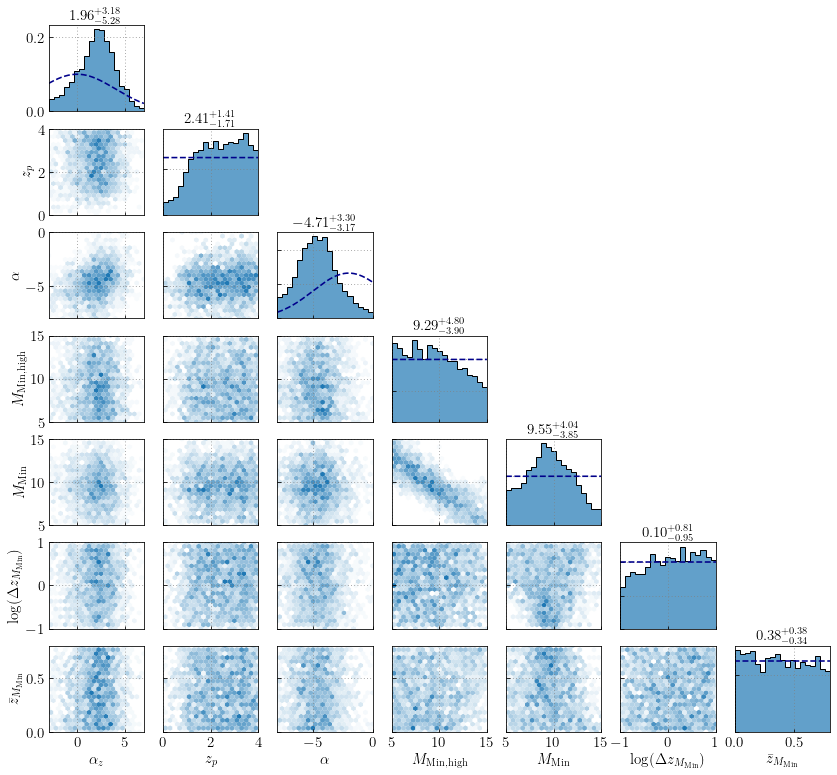

In [5]:
fig = plt.figure(figsize=(14,13))
stacked_samples_no_GWB = data.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB_mMin = {
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-3,7),"label":r"$\alpha_z$"},
    "zp":{"data":stacked_samples_no_GWB.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-8,0),"label":r"$\alpha$"},
    "high_mMin":{"data":stacked_samples_no_GWB.high_mMin,"plot_bounds":(5,15),"label":r"$M_{\rm Min, high}$"},
    "mMin":{"data":stacked_samples_no_GWB.mMin,"plot_bounds":(5,15),"label":r"$M_{\rm Min}$"},
    "width_mMin":{"data":stacked_samples_no_GWB.log_width_mMin,"plot_bounds":(-1,1),"label":r"$\log(\Delta z_{M_{\rm Min}})$"},
    "middle_z_mMin":{"data":stacked_samples_no_GWB.middle_z_mMin,"plot_bounds":(0,0.8),"label":r"$\bar z_{M_{\rm Min}}$"},
}

plot_corner(fig, toPlot_no_GWB_mMin,"#1f78b4",labelsize=15, priors = new_priors)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()
plt.savefig("PE_mMin_power_law.png", dpi = 500, bbox_inches = "tight")
plt.show()

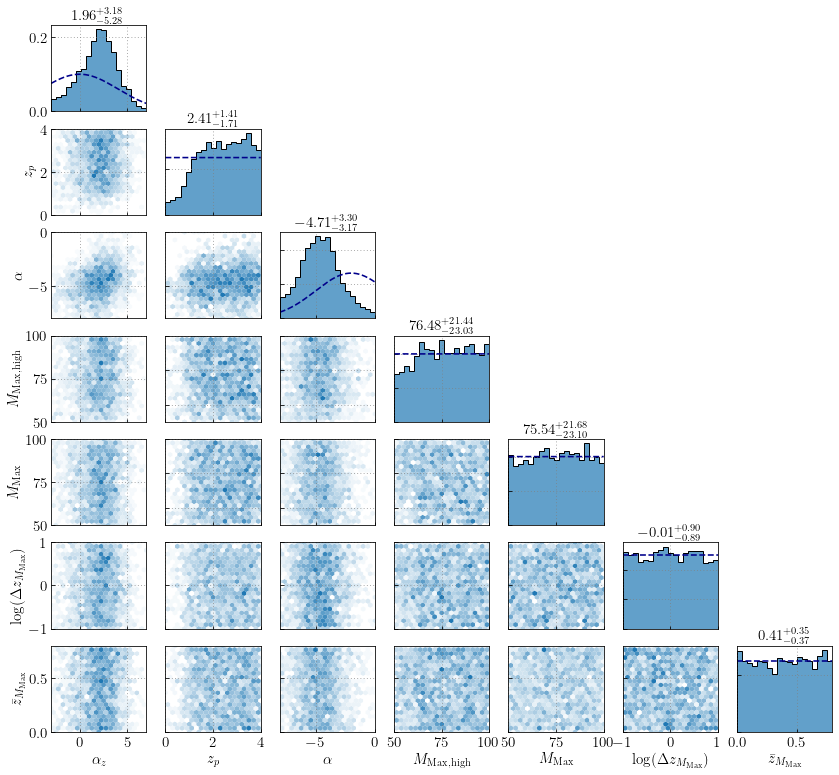

In [6]:
fig = plt.figure(figsize=(14,13))
stacked_samples_no_GWB = data.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB_mMax = {
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-3,7),"label":r"$\alpha_z$"},
    "zp":{"data":stacked_samples_no_GWB.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-8,0),"label":r"$\alpha$"},
    "high_mMax":{"data":stacked_samples_no_GWB.high_mMax,"plot_bounds":(50,100),"label":r"$M_{\rm Max, high}$"},
    "mMax":{"data":stacked_samples_no_GWB.mMax,"plot_bounds":(50,100),"label":r"$M_{\rm Max}$"},
    "width_mMax":{"data":stacked_samples_no_GWB.log_width_mMax,"plot_bounds":(-1,1),"label":r"$\log(\Delta z_{M_{\rm Max}})$"},
    "middle_z_mMax":{"data":stacked_samples_no_GWB.middle_z_mMax,"plot_bounds":(0,0.8),"label":r"$\bar z_{M_{\rm Max}}$"},
}

plot_corner(fig, toPlot_no_GWB_mMax,"#1f78b4",labelsize=15, priors = new_priors)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()
plt.savefig("PE_mMax_power_law.png", dpi = 500, bbox_inches = "tight")
plt.show()

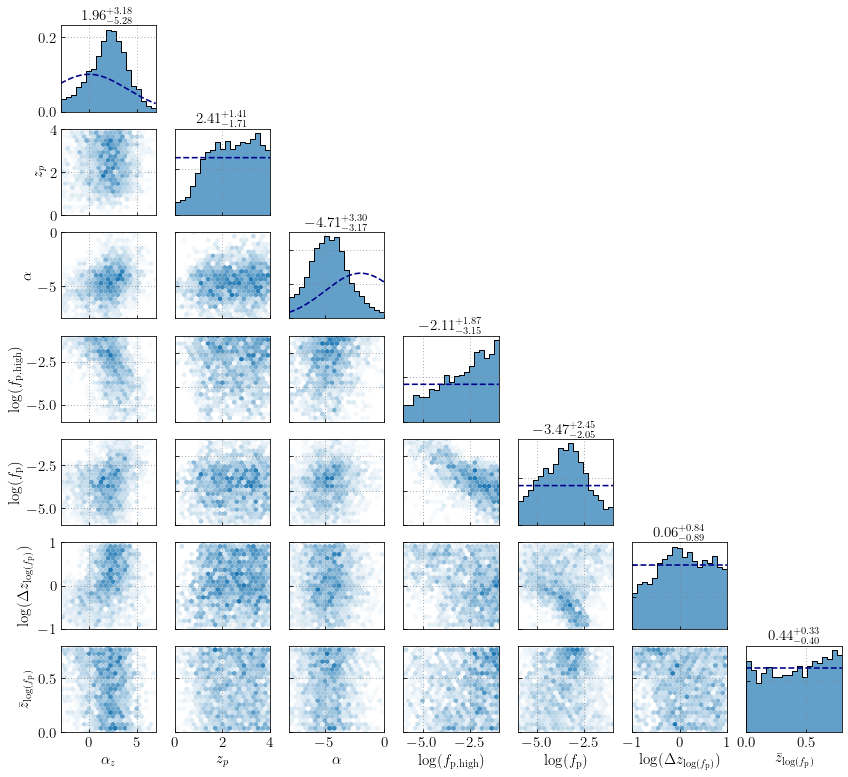

In [7]:
fig = plt.figure(figsize=(14,13))
stacked_samples_no_GWB = data.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB_f_peak = {
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-3,7),"label":r"$\alpha_z$"},
    "zp":{"data":stacked_samples_no_GWB.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-8,0),"label":r"$\alpha$"},
    "high_f_peak":{"data":stacked_samples_no_GWB.log_high_f_peak,"plot_bounds":(-6,-1),"label":r"$\log(f_{\rm p, high})$"},
    "fpeak":{"data":stacked_samples_no_GWB.log_f_peak,"plot_bounds":(-6,-1),"label":r"$\log(f_{\rm p})$"},
    "width_f_peak":{"data":stacked_samples_no_GWB.log_width_f_peak,"plot_bounds":(-1,1),"label":r"$\log(\Delta z_{\log(f_{\rm p})})$"},
    "middle_z_f_peak":{"data":stacked_samples_no_GWB.middle_z_f_peak,"plot_bounds":(0,0.8),"label":r"$\bar z_{\log(f_{\rm p})}$"},
}

fig = plot_corner(fig, toPlot_no_GWB_f_peak,"#1f78b4",labelsize=15, priors = new_priors)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()
plt.savefig("PE_f_peak_power_law_with_lambda.png", dpi = 500, bbox_inches = "tight")
plt.show()

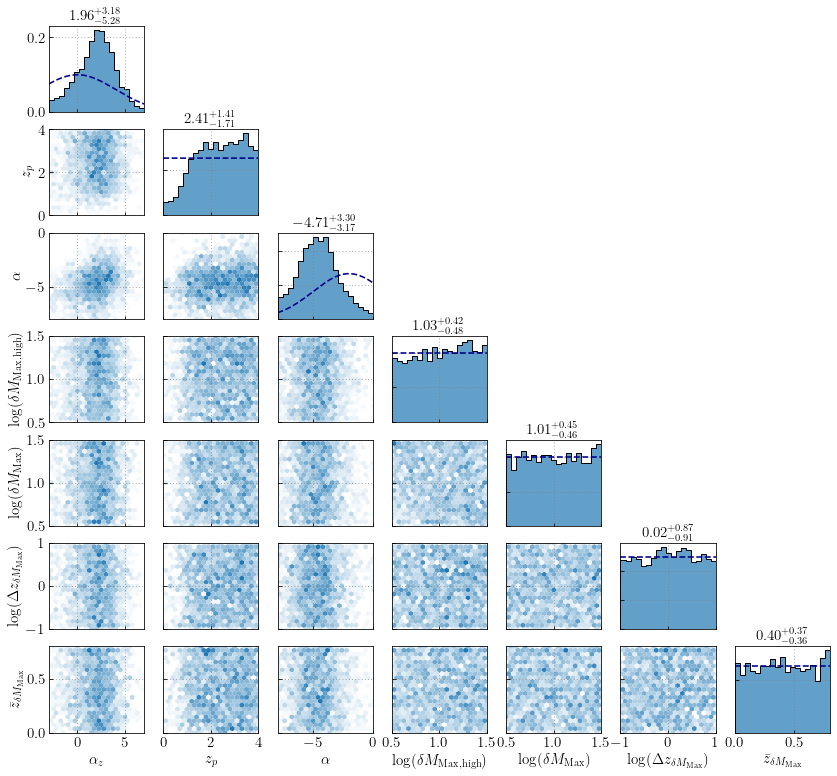

In [8]:
fig = plt.figure(figsize=(14,13))
stacked_samples_no_GWB = data.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB_dmMax = {
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-3,7),"label":r"$\alpha_z$"},
    "zp":{"data":stacked_samples_no_GWB.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-8,0),"label":r"$\alpha$"},
    "high_dmMax":{"data":stacked_samples_no_GWB.log_high_dmMax,"plot_bounds":(0.5,1.5),"label":r"$\log(\delta M_{\rm Max, high})$"},
    "dmMax":{"data":stacked_samples_no_GWB.log_dmMax,"plot_bounds":(0.5,1.5),"label":r"$\log(\delta M_{\rm Max})$"},
    "width_dmMax":{"data":stacked_samples_no_GWB.log_width_dmMax,"plot_bounds":(-1,1),"label":r"$\log(\Delta z_{\delta M_{\rm Max}})$"},
    "middle_z_dmMax":{"data":stacked_samples_no_GWB.middle_z_dmMax,"plot_bounds":(0,0.8),"label":r"$\bar z_{\delta M_{\rm Max}}$"},
}

plot_corner(fig, toPlot_no_GWB_dmMax,"#1f78b4",labelsize=15, priors = new_priors)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()
plt.savefig("PE_dmMax_power_law.png", dpi = 500, bbox_inches = "tight")
plt.show()

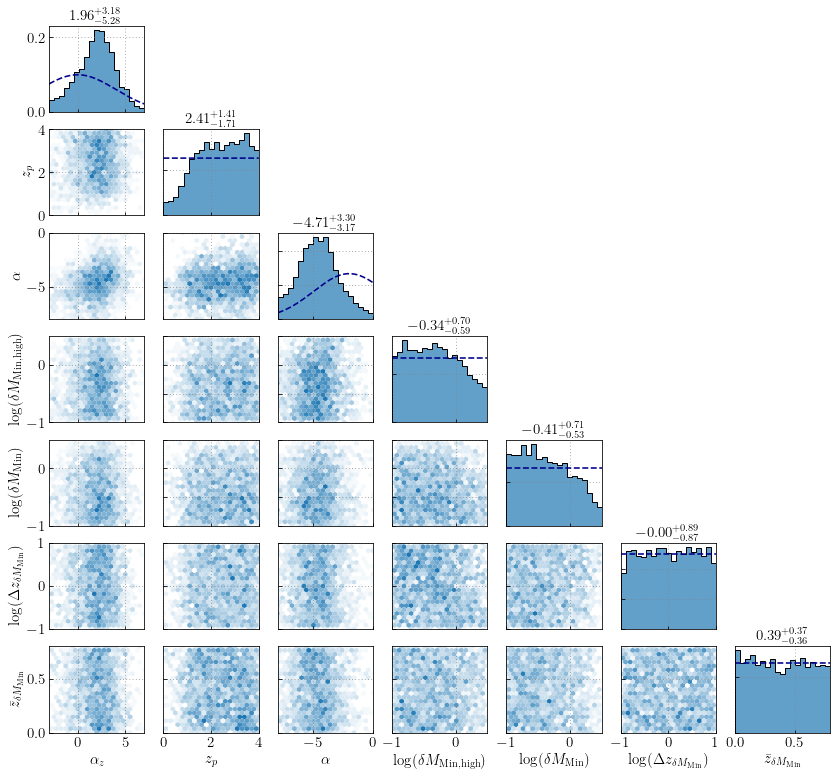

In [9]:
fig = plt.figure(figsize=(14,13))
stacked_samples_no_GWB = data.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB_dmMin = {
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-3,7),"label":r"$\alpha_z$"},
    "zp":{"data":stacked_samples_no_GWB.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-8,0),"label":r"$\alpha$"},
    "high_dmMin":{"data":stacked_samples_no_GWB.log_high_dmMin,"plot_bounds":(-1,0.5),"label":r"$\log(\delta M_{\rm Min, high})$"},
    "dmMin":{"data":stacked_samples_no_GWB.log_dmMin,"plot_bounds":(-1,0.5),"label":r"$\log(\delta M_{\rm Min})$"},
    "width_dmMin":{"data":stacked_samples_no_GWB.log_width_dmMin,"plot_bounds":(-1,1),"label":r"$\log(\Delta z_{\delta M_{\rm Min}})$"},
    "middle_z_dmMin":{"data":stacked_samples_no_GWB.middle_z_dmMin,"plot_bounds":(0,0.8),"label":r"$\bar z_{\delta M_{\rm Min}}$"},
}

plot_corner(fig, toPlot_no_GWB_dmMin,"#1f78b4",labelsize=15, priors = new_priors)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()
plt.savefig("PE_dmMin_power_law.png", dpi = 500, bbox_inches = "tight")
plt.show()